Autores:

Autor 1: Matias Cartes Rivera, matias.cartes2001@alumnos.ubiobio.cl

Autor 2: Juan Carlos Francisco Poveda, juan.francisco2001@alumnos.ubiobio.cl

Profesora: Jazna Patricia Meza Hidalgo

Materia: Inteligencia Artificial

Entrega numero 5.

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

In [2]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [3]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

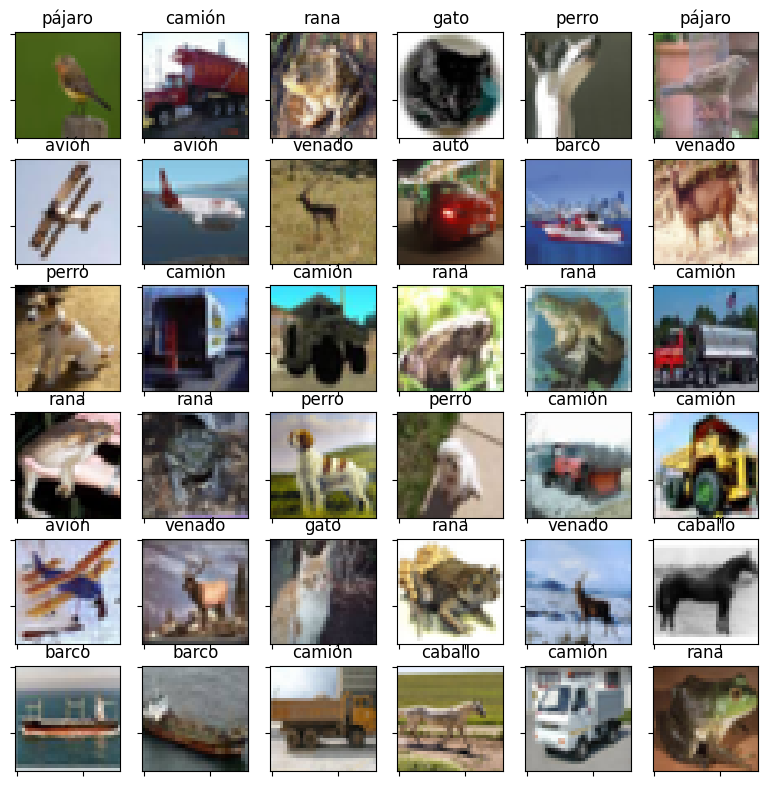

In [6]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [7]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [8]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [9]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrena la red
start_time_base = time()
num_epocas = 5
x_batch_size = 128
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))
end_time_base = time()
print("Train time: %0.10f seconds." % (end_time_base - start_time_base))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2818 - loss: 2.0098 - val_accuracy: 0.3087 - val_loss: 1.8960
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3507 - loss: 1.8317 - val_accuracy: 0.3439 - val_loss: 1.8084
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3789 - loss: 1.7601 - val_accuracy: 0.3666 - val_loss: 1.7546
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3991 - loss: 1.7071 - val_accuracy: 0.3869 - val_loss: 1.7089
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4136 - loss: 1.6642 - val_accuracy: 0.4005 - val_loss: 1.6742
Train time: 15.7544031143 seconds.


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

#### Experimento 1 - 1 punto

In [18]:
h1 = 4096
h2 = 1024
h3 = 256


red_1 = keras.Sequential(name="Red_Evaluacion_Experimento1")
red_1.add(keras.layers.Input(shape=(N,), name='entrada'))
red_1.add(keras.layers.Dense(h1, activation='relu', name="Capa_1"))
red_1.add(keras.layers.Dense(h1, activation='relu', name="Capa_2"))
red_1.add(keras.layers.Dense(h2, activation='relu', name="Capa_3"))
red_1.add(keras.layers.Dense(h2, activation='relu', name="Capa_4"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_5"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_6"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_7"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_8"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_9"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_10"))
red_1.add(keras.layers.Dense(h3, activation='relu', name="Capa_11"))
red_1.add(keras.layers.Dense(C, activation='softmax', name="Cap4_s4lida"))
red_1.summary()

red_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion_Experimento1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_1 (Dense)                  │ (None, 4096)           │    12,587,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_2 (Dense)                  │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_3 (Dense)                  │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_4 (Dense)                  │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_5 (Dense)                  │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_6 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_7 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_8 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_9 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_10 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_11 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cap4_s4lida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,272,970 (134.56 MB)

 Trainable params: 35,272,970 (134.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrena la red
start_time_exp1 = time()
history1 = red_1.fit(X_train, Y_train,
                        epochs = 100,
                        batch_size= 300,
                        validation_data=(X_test,Y_test))
end_time_exp1 = time()
print("Train time: %0.10f seconds." % (end_time_exp1 - start_time_exp1))

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 276ms/step - accuracy: 0.1440 - loss: 2.2922 - val_accuracy: 0.1598 - val_loss: 2.2741
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 280ms/step - accuracy: 0.1709 - loss: 2.2147 - val_accuracy: 0.1659 - val_loss: 2.1845
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 282ms/step - accuracy: 0.2160 - loss: 2.0977 - val_accuracy: 0.2409 - val_loss: 2.0598
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 49s 293ms/step - accuracy: 0.2652 - loss: 2.0068 - val_accuracy: 0.2570 - val_loss: 1.9880
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 284ms/step - accuracy: 0.2906 - loss: 1.9320 - val_accuracy: 0.3056 - val_loss: 1.9267
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 318ms/step - accuracy: 0.3151 - loss: 1.8806 - val_accuracy: 0.3250 - val_loss: 1.8928
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 323ms/step - accuracy: 0.3351 - loss: 1.8358 - val_accuracy: 0.3469 - val_loss: 1.8247
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 325ms/step - accuracy: 0.3521 -

#### Experimento 2 - 1 punto

In [11]:
h1 = 2048
h2 = 1024
h3 = 512
h4 = 256
h5 = 128

red_2 = keras.Sequential(name="Red_Evaluacion_Experimento2")
red_2.add(keras.layers.Input(shape=(N,), name='entrada'))
red_2.add(keras.layers.Dense(h1, activation='relu', name="Capa_1"))
red_2.add(keras.layers.Dense(h2, activation='relu', name="Capa_2"))
red_2.add(keras.layers.Dense(h2, activation='relu', name="Capa_3"))
red_2.add(keras.layers.Dense(h3, activation='relu', name="Capa_4"))
red_2.add(keras.layers.Dense(h3, activation='relu', name="Capa_5"))
red_2.add(keras.layers.Dense(h4, activation='relu', name="Capa_6"))
red_2.add(keras.layers.Dense(h4, activation='relu', name="Capa_7"))
red_2.add(keras.layers.Dense(h5, activation='relu', name="Capa_8"))
red_2.add(keras.layers.Dense(C, activation='softmax', name="Cap4_s4lida"))
red_2.summary()

red_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion_Experimento2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_1 (Dense)                  │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_2 (Dense)                  │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_3 (Dense)                  │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_4 (Dense)                  │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_5 (Dense)                  │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_6 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_7 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_8 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cap4_s4lida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,460,042 (39.90 MB)

 Trainable params: 10,460,042 (39.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrena la red
start_time_exp2 = time()
num_epocas = 100
x_batch_size = 200
history2 = red_2.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))
end_time_exp2 = time()
print("Train time: %0.10f seconds." % (end_time_exp2 - start_time_exp2))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.1992 - loss: 2.1658 - val_accuracy: 0.2638 - val_loss: 2.0222
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.3011 - loss: 1.9473 - val_accuracy: 0.3425 - val_loss: 1.8527
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.3406 - loss: 1.8424 - val_accuracy: 0.3680 - val_loss: 1.7641
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.3669 - loss: 1.7702 - val_accuracy: 0.3838 - val_loss: 1.7211
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.3860 - loss: 1.7172 - val_accuracy: 0.3931 - val_loss: 1.6883
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.4020 - loss: 1.6732 - val_accuracy: 0.4058 - val_loss: 1.6556
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.4180 - loss: 1.6351 - val_accuracy: 0.4235 - val_loss: 1.6179
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.4328 - loss: 1

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto

**Para el experimento número 1:**

Tenemos una entrada de 3072 neuronas que corresponden a la imagen aplanada de 32x32x3 píxeles.

**Capa 1 (Capa_1):**

* Entrada: 3072 neuronas (la imagen)
* Salida: 4096 neuronas
* Cálculo:
    * Pesos = 3072 × 4096 = 12,582,912
    * Sesgos = 4096
    * Total = 12,582,912 + 4096 = 12,587,008 parámetros

**Capa 2 (Capa_2):**

* Entrada: 4096 (salida de la capa 1)
* Salida: 4096
* Cálculo:
    * Pesos = 4096 × 4096 = 16,777,216
    * Sesgos = 4096
    * Total = 16,777,216 + 4096 = 16,781,312 parámetros

**Capa 3 (Capa_3):**

* Entrada: 4096 (salida de la capa 2)
* Salida: 1024
* Cálculo:
    * Pesos = 4096 × 1024 = 4,194,304
    * Sesgos = 1024
    * Total = 4,194,304 + 1024 = 4,195,328 parámetros

**Capa 4 (Capa_4):**

* Entrada: 1024 (salida de la capa 3)
* Salida: 1024
* Cálculo:
    * Pesos = 1024 × 1024 = 1,048,576
    * Sesgos = 1024
    * Total = 1,048,576 + 1024 = 1,049,600 parámetros

**Capa 5 (Capa_5):**

* Entrada: 1024 (salida de la capa 4)
* Salida: 256
* Cálculo:
    * Pesos = 1024 × 256 = 262,144
    * Sesgos = 256
    * Total = 262,144 + 256 = 262,400 parámetros

**Capa 6 (Capa_6):**

* Entrada: 256 (salida de la capa 5)
* Salida: 256
* Cálculo:
    * Pesos = 256 × 256 = 65,536
    * Sesgos = 256
    * Total = 65,536 + 256 = 65,792 parámetros

**Capa 7 (Capa_7):**

* Entrada: 256 (salida de la capa 6)
* Salida: 256
* Cálculo:
    * Pesos = 256 × 256 = 65,536
    * Sesgos = 256
    * Total = 65,536 + 256 = 65,792 parámetros

**Capa 8 (Capa_8):**

* Entrada: 256 (salida de la capa 7)
* Salida: 256
* Cálculo:
    * Pesos = 256 × 256 = 65,536
    * Sesgos = 256
    * Total = 65,536 + 256 = 65,792 parámetros

**Capa 9 (Capa_9):**

* Entrada: 256 (salida de la capa 8)
* Salida: 256
* Cálculo:
    * Pesos = 256 × 256 = 65,536
    * Sesgos = 256
    * Total = 65,536 + 256 = 65,792 parámetros

**Capa 10 (Capa_10):**

* Entrada: 256 (salida de la capa 9)
* Salida: 256
* Cálculo:
    * Pesos = 256 × 256 = 65,536
    * Sesgos = 256
    * Total = 65,536 + 256 = 65,792 parámetros

**Capa 11 (Capa_11):**

* Entrada: 256 (salida de la capa 10)
* Salida: 256
* Cálculo:
    * Pesos = 256 × 256 = 65,536
    * Sesgos = 256
    * Total = 65,536 + 256 = 65,792 parámetros

**Capa de Salida (Cap4_s4lida):**

* Entrada: 256
* Salida: 10 (una por clase)
* Cálculo:
    * Pesos = 256 × 10 = 2,560
    * Sesgos = 10
    * Total = 2,560 + 10 = 2,570 parámetros

Total: 35,046,786 parámetros, que son los elementos que la red aprende durante el entrenamiento.

Se puede apreciar un diseño de embudo (Funnel Design). Al principio, las capas tienen muchas neuronas para absorber muchos patrones posibles.
Luego, el modelo mantiene un tamaño reducido con varias capas sucesivas de la misma dimensión, lo cual permite capturar combinaciones complejas de características a ese nivel. Este diseño busca mejorar la capacidad de aprendizaje profundo.

Por otra parte, se observa que el entrenamiento se realiza con el optimizador SGD, lo que requiere un número adecuado de épocas y un buen ajuste del learning rate para lograr convergencia efectiva, especialmente en una red tan profunda como esta.

#### Red experimento 2 - 1 punto

**Para el experimento número 2:**

Tenemos una entrada de 3072 neuronas que corresponden a la imágen aplanada de 32x32x3 pixeles.

**Capa 1 (Capa_1):**


*   Entrada: 3072 neuronas (la imágen)
*   Salida: 2048 neuronas
*   Cálculo:
    *   Pesos = 3072 × 2048 = 6,291,456
    *   Sesgos = 2048
    *   Total = 6,291,456 + 2,048 = 6,293,504 parametros

**Capa 2 (Capa_2):**

*   Entrada: 2048 (salida de la capa 1)
*   Salida: 1024
*   Cálculo:
    *   Pesos = 2048 × 1024 = 2,097,152
    *   Sesgos = 1024
    *   Total = 2,097,152 + 1,024 = 2,098,176 parametros

**Capa 3 (Capa_3):**

*   Entrada: 1024 (salida de la capa 2)
*   Salida: 1024
*   Cálculo:
    * Pesos = 1024 × 1024 = 1,048,576
    *   Sesgos = 1024
    *   Total = 1,048,576 + 1,024 = 1,049,600 parametros

**Capa 4 (Capa_4):**

*   Entrada: 1024 (salida de la capa 3)
*   Salida: 512
*   Cálculo:
    *   Pesos = Pesos = 1024 × 512 = 524,288
    *   Sesgos = Biases = 512
    *   Total = 524,288 + 512 = 524,800 parametros

**Capa 5 (Capa_5):**

*   Entrada: 512 (salida de la capa 4)
*   Salida: 512
*   Cálculo:
    *   Pesos = 512 × 512 = 262,144
    *   Sesgos = 512
    *   Total = 262,144 + 512 = 262,656 parametros

**Capa 6 (Capa_6):**

*   Entrada: 512 (salida de la capa 5)
*   Salida: 256
*   Cálculo:
    *   Pesos = 512 × 256 = 131,072
    *   Sesgos = 256
    *   Total = 131,072 + 256 = 131,328 parametros

**Capa 7 (Capa_7):**

*   Entrada: 256 (salida de la capa 6)
*   Salida: 256
*   Cálculo:
    *   Pesos = 256 × 256 = 65,536
    *   Sesgos = 256
    *   Total = 65,536 + 256 = 65,792 parametros

**Capa 8 (Capa_8):**

*   Entrada: 256 (salida de la capa 7)
*   Salida: 128
*   Cálculo:
    *   Pesos = 256 × 128 = 32,768
    *   Sesgos = 128
    *   Total = 32,768 + 128 = 32,896 parametros


**Capa de Salida (Capa_salida):**

*   Entrada: 128
*   Salida: 10 (una por clase)
*   Cálculo:
    *   Pesos = 128 × 10 = 1,280
    *   Sesgos = 10
    *   Total = 1,280 + 10 = 1,290


Todo esto nos da un total de: 10,460,042 parametros, que son los elementos que la red aprende durante el entrenamiento.
Se puede apreciar un diseño de embudo (Funnel Design). Al principio, las capas tienen muchas neuronas para absorber muchos patrones posibles.
Luego el modelo se va reduciendo progresivamente en dimensionalidad, lo cual sirve para hacer compresión de características y evitar overfitting.

Por otra parte, podemos ver que el entrenamiento se hace por 100 épocas y un batch size de 200, lo cual es costoso y lento si no se cuenta con aceleración por GPU.

## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos

In [22]:
tiempo_exp1 = end_time_exp1 - start_time_exp1
tiempo_base = end_time_base - start_time_base
print("Train time para el caso base: %0.10f seconds." % (tiempo_base))

print("Train time para el experimento 1: %0.10f seconds." % (tiempo_exp1))

print("El experimento 1 tomó un tiempo de entrenamiento de %0.10f segundos más que el modelo base." % (tiempo_exp1 - tiempo_base))


Train time para el caso base: 15.7544031143 seconds.
Train time para el experimento 1: 4477.5040762424 seconds.
El experimento 1 tomó un tiempo de entrenamiento de 4461.7496731281 segundos más que el modelo base.


In [13]:
tiempo_exp2 = end_time_exp2 - start_time_exp2
tiempo_base = end_time_base - start_time_base
print("Train time para el caso base: %0.10f seconds." % (tiempo_base))

print("Train time para el experimento 2: %0.10f seconds." % (tiempo_exp2))

print("El experimento 2 tomó un tiempo de entrenamiento de %0.10f segundos más que el modelo base." % (tiempo_exp2 - tiempo_base))


Train time para el caso base: 15.7544031143 seconds.
Train time para el experimento 2: 1750.3769297600 seconds.
El experimento 2 tomó un tiempo de entrenamiento de 1734.6225266457 segundos más que el modelo base.


### Mostrar curvas de entrenamiento/validación - 0,1 puntos

*Curvas Experimento 1:*

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

plt.plot(smooth_curve(history1.history['accuracy']), label='Entrenamiento')
plt.plot(smooth_curve(history1.history['val_accuracy']), label='Validación')
plt.title('Curva de precisión (Experimento 1)', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(smooth_curve(history1.history['loss']), label='Entrenamiento')
plt.plot(smooth_curve(history1.history['val_loss']), label='Validación')
plt.title('Curva de pérdida (Experimento 1)', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.ylabel('Pérdida')
plt.legend()
plt.show()

NameError: name 'history1' is not defined

*Curvas Experimento 2:*

In [23]:
def smooth_curve(points, factor=0.9):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

plt.plot(smooth_curve(history2.history['accuracy']), label='Entrenamiento')
plt.plot(smooth_curve(history2.history['val_accuracy']), label='Validación')
plt.title('Curva de precisión', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(smooth_curve(history2.history['loss']), label='Entrenamiento')
plt.plot(smooth_curve(history2.history['val_loss']), label='Validación')
plt.title('Curva de pérdida', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.ylabel('Pérdida')
plt.legend()
plt.show()


NameError: name 'history2' is not defined



---


## Discusiones



---



### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)

Sí, en el experimento 1 también hay sobreajuste. Esto se nota porque la precisión en el entrenamiento es muy alta, cercana al 100%, mientras que en validación es mucho más baja. La red tiene muchas capas y parámetros (más de 35 millones), lo que hace que aprenda muy bien los datos de entrenamiento, pero no logra generalizar bien a datos nuevos. Además, no se usaron técnicas para evitar el sobreajuste, como regularización o dropout.

Para el caso del experimento 2, sí, existe un sobreajuste considerable, esto se evidencia en la alta precisión de entrenamiento de hasta 99%, pero con una precisión bastante baja, de alrededor de un 55%, esto ocurre debido a la alta cantidad de capas, neuronas y millones de parámetros de la red, lo que si bien permite que el modelo aprenda datos de entrenamiento con mayor facilidad, ésta no logra generalizar correctamente para datos nuevos.

### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

Las redes feedforward no son ideales para tareas de clasificación de imágenes complejas como CIFAR-10, ya que no pueden extraer patrones espaciales relevantes, esto debido que al aplanar la imagen, pasa de ser una estructura de 2D o 3D a un vector 1D, esto hace que la red no tenga una noción de que píxeles están cerca entre sí, ni de patrones visuales como bordes, formas o texturas. Por el contrario, trata cada píxel como una característica independiente.

### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

* Una de las limitaciones encontradas fue el intentar aumentar el accuracy sin aumentar drasticamente el sobreajuste, el accuracy se mantuvo en alrededor de un 55% y no fuimos capaces de aumentarlo más allá.
* Debido a lo costoso de los modelos, el entrenamiento tomaba un tiempo considerable entre cada experimento, esto es una limitación de hardware debido a que no contamos con una tarjeta gráfica capaz de realizar aceleración por hardware (CUDA o ROCm).
